In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('kc_house_data-Copy1.csv')

In [ ]:
# A data set contains 21613 obervations with 19 features plus house price. The names of the columns are given below.

#0     id
#1     date: Date house was sold(String)
#2     price: Price of the sold house
#3     bedrooms: Numer of Bedrooms
#4     bathrooms: Numer of bathrooms
#5     sqft_living: Square footage of the living room
#6     sqrt_lot: Square footage of the log
#7     floors: Total floors in the house
#8     waterfront: Whether the house has a view a waterfront(1: yes, 0: not)
#9     view: unknown
#10     condtion: Condition of the house
#11     grade: unknown
#12     sqft_above: Square footage of house apart from basement
#13     sqft_basement: Square footage of the basement
#14     yr_built: Built year
#15     yr_renovated: Year when the house was renovated
#16     zipcode: zipcode of the house
#17     lat: Latitude coordinate
#18   long Longitude coordinate
#19   sqft_living15: Living room area in 2015(implies some renovations)
#20   sqrt_lot15: Lot area in 2015(implies some renovations)

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Deleting column 0 - id
df.drop(['id'], axis=1, inplace=True)

# Data description

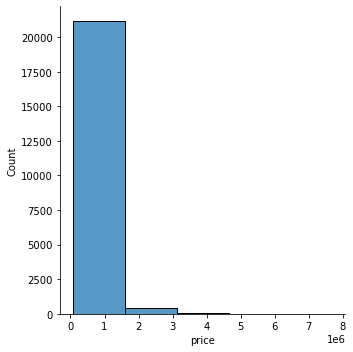

In [81]:
#1 price
sns.displot(df.price, bins=5)

In [84]:
df[df['price']>6450000] #list of rows with prices >75percentile

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [85]:
# droping three outliers
df.drop(df[df['price'] > 6450000].index, inplace=True)

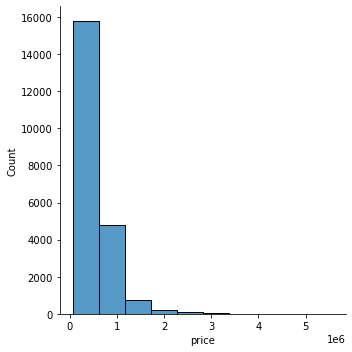

In [87]:
sns.displot(df.price, bins=10)

In [7]:
#2-3 bedrooms, bathrooms
df[(df['bedrooms']==0) & (df['bathrooms']==0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6994,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
14423,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [10]:
#2 bedrooms
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

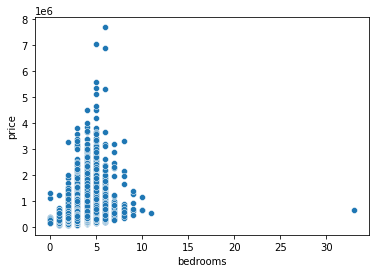

In [14]:
sns.scatterplot(x='bedrooms', y='price', data=df)

In [11]:
from numpy.lib.function_base import average
df.groupby('bedrooms').agg(
    {
        'price':[min, average, max],
        'sqft_living':[min, average, max],
        'bathrooms': [average]
    })

price                          sqft_living                      \
               min       average        max         min      average    max   
bedrooms                                                                      
0         139950.0  4.095038e+05  1295650.0         290  1707.846154   4810   
1          75000.0  3.176429e+05  1247000.0         370   884.613065   3000   
2          78000.0  4.013727e+05  3278000.0         440  1239.752899   6840   
3          82000.0  4.662321e+05  3800000.0         490  1805.837235   6400   
4         100000.0  6.354195e+05  4489000.0         800  2554.649666   7850   
5         133000.0  7.865998e+05  7062500.0        1120  3047.545284  10040   
6         175000.0  8.255206e+05  7700000.0        1370  3284.341912  12050   
7         280000.0  9.511847e+05  3200000.0        1940  3974.210526  13540   
8         340000.0  1.105077e+06  3300000.0        2280  3800.000000   7710   
9         450000.0  8.939998e+05  1400000.0        2820  3775.000000   4620   
10        650000.0  8.193333e+05  1148000.0        2920  3706.666667   4590   
11        520000.0  5.200000e+05   520000.0        3000  3000.000000   3000   
33        640000.0  6.400000e+05   640000.0        1620  1620.000000   1620   

         bathrooms  
           average  
bedrooms            
0         0.826923  
1         1.066583  
2         1.401721  
3         1.968394  
4         2.436428  
5         2.778576  
6         3.068015  
7         3.651316  
8         3.557692  
9         4.416667  
10        3.416667  
11        3.000000  
33        1.750000

In [12]:
# 33 bedrooms is a mistake, I'm changing it into 3:
df.loc[15870,'bedrooms']=3

In [13]:
df[df['bedrooms']==0].sort_values('price')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14423,20150413T000000,139950.0,0,0.00,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
4868,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
9854,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
8484,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
18379,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
3467,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
12653,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675
8477,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
9773,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050


In [14]:
# 0 bedrooms is a mistake, I'm changing it into 7 (where price > 1.000.000):
df["bedrooms"] = np.where( ((df["bedrooms"] == 0) & (df["price"] > 1000000)), 7, df["bedrooms"])
# changing into 2 (where price >= 320.000):
df["bedrooms"] = np.where( ((df["bedrooms"] == 0) & (df["price"] >= 320000)), 2, df["bedrooms"])
# changing into 1 (where price > 320.000):
df["bedrooms"] = np.where( ((df["bedrooms"] == 0) & (df["price"] < 320000)), 1, df["bedrooms"])

In [15]:
df['bedrooms'].value_counts()

3     9825
4     6882
2     2764
5     1601
6      272
1      206
7       40
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

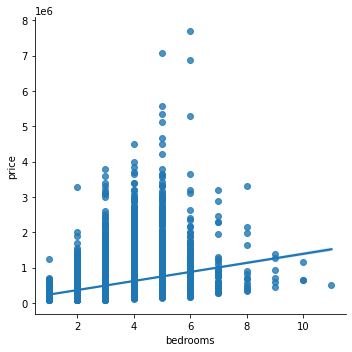

In [16]:
sns.lmplot(x='bedrooms', y='price', data=df)

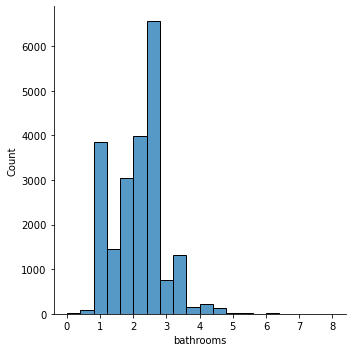

In [17]:
#3 bathrooms
sns.displot(df.bathrooms, bins=20)

In [9]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [19]:
df[df['bathrooms']<0.5].sort_values('price')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
14423,20150413T000000,139950.0,1,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,20140926T000000,142000.0,1,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
9854,20141223T000000,235000.0,1,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
5832,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
9773,20150429T000000,355000.0,2,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
3119,20150205T000000,380000.0,2,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
10481,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
875,20140612T000000,1095000.0,7,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
6994,20140624T000000,1295650.0,7,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061


In [47]:
df.groupby('bathrooms').agg(
    {
        'price':[min, average, max],
        'sqft_living':[min, average, max]
    })

price                          sqft_living                     
                 min       average        max         min       average    max
bathrooms                                                                     
0.00         75000.0  4.481600e+05  1295650.0         290   1636.800000   4810
0.50        109000.0  2.373750e+05   312500.0         580   1235.000000   2300
0.75         80000.0  2.945209e+05   785000.0         370    896.611111   2510
1.00         78000.0  3.470412e+05  1300000.0         390   1181.123313   3410
1.25        275000.0  6.212167e+05  1388000.0         860   1525.555556   2400
1.50        107000.0  4.093222e+05  1500000.0         680   1544.630014   3520
1.75        115000.0  4.548961e+05  3278000.0         590   1787.202428   6840
2.00        115000.0  4.578897e+05  2200000.0         720   1796.669430   5461
2.25        160000.0  5.336768e+05  2400000.0         850   2097.700537   4910
2.50        153503.0  5.535965e+05  3070000.0         750   2377.901115   5760
2.75        183750.0  6.602304e+05  2700000.0         730   2669.998312   5700
3.00        154000.0  7.084152e+05  4489000.0        1160   2736.035857   6430
3.25        176000.0  9.703398e+05  3640900.0        1210   3223.940577   7420
3.50        216650.0  9.319331e+05  3710000.0        1130   3411.303694   7350
3.75        255000.0  1.197217e+06  3650000.0        1580   3779.741935   7620
4.00        265000.0  1.267709e+06  3400000.0        1390   4071.867647   7850
4.25        490000.0  1.525774e+06  3850000.0        1960   4609.329114   6980
4.50        290000.0  1.333620e+06  7062500.0        2120   4405.940000  10040
4.75        480000.0  2.021304e+06  3650000.0        3700   5275.652174   7880
5.00        343000.0  1.673492e+06  5350000.0        2732   4851.857143   8000
5.25        300000.0  1.817177e+06  5110800.0        2860   5016.153846   8010
5.50        925000.0  2.522300e+06  4500000.0        5060   6506.000000   7400
5.75        540000.0  2.492500e+06  5570000.0        3700   6962.500000   9200
6.00        900000.0  2.946833e+06  5300000.0        4340   6443.333333   7440
6.25       2888000.0  3.094000e+06  3300000.0        8020   8345.000000   8670
6.50       1180000.0  1.709445e+06  2238890.0        6260   6765.000000   7270
6.75        800000.0  2.734000e+06  4668000.0        7480   8560.000000   9640
7.50        450000.0  4.500000e+05   450000.0        4050   4050.000000   4050
7.75       6885000.0  6.885000e+06  6885000.0        9890   9890.000000   9890
8.00       2280000.0  4.990000e+06  7700000.0       12050  12795.000000  13540

In [23]:
# 0 bathrooms is a mistake, I'm changing it into 4 (where price > 1.000.000):
df["bathrooms"] = np.where( ((df["bathrooms"] == 0) & (df["price"] > 1000000)), 4, df["bathrooms"])
# changing into 0.75 (where sqfl_living < 1.000):
df["bathrooms"] = np.where( ((df["bathrooms"] == 0) & (df["sqft_living"] < 1000)), 0.75, df["bathrooms"])
# changing into 1 for the rest:
df["bathrooms"] = np.where(df["bathrooms"] == 0, 1, df["bathrooms"])

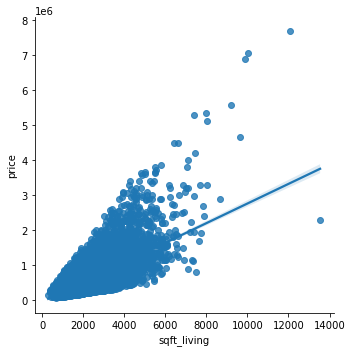

In [27]:
#4 sqft_living
sns.lmplot(x='sqft_living', y='price', data=df)

In [80]:
df[df['sqft_living']>10000].sort_values('price')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
3914,20140611T000000,7062500.0,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


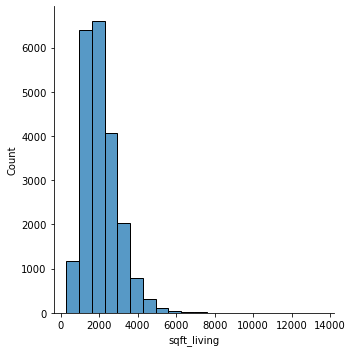

In [28]:
sns.displot(df.sqft_living, bins=20)
plt.show()

In [ ]:
#5 sqft_lot

In [30]:
#6 floors
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

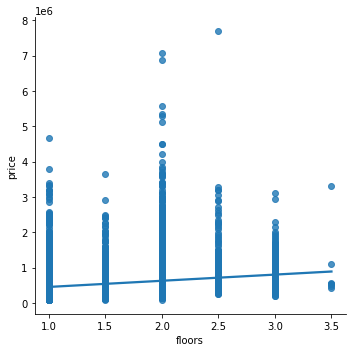

In [31]:
sns.lmplot(x='floors', y='price', data=df)
plt.show()

In [33]:
#7 waterfront
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [32]:
#8 view
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [34]:
#9 condition
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [36]:
df.groupby('condition').agg(
    {
        'price':[min, average, max],
    })

price                          
                min        average        max
condition                                    
1           78000.0  334431.666667  1500000.0
2           80000.0  327287.145349  2555000.0
3           75000.0  542012.578148  7062500.0
4           89000.0  521200.390033  7700000.0
5          110000.0  612418.089359  3650000.0

In [37]:
#10 grade
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

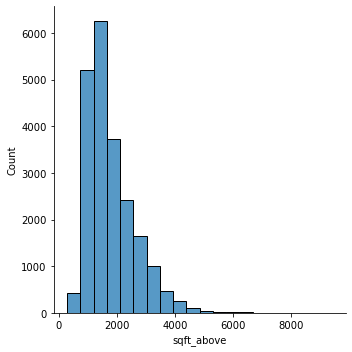

In [38]:
#11 sqft_above: Square footage of house apart from basement
sns.displot(df.sqft_above, bins=20)
plt.show()

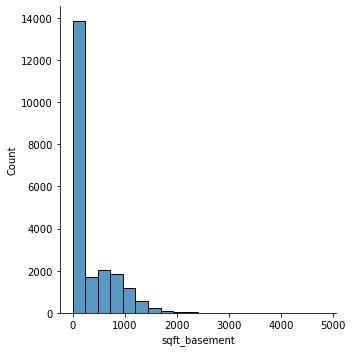

In [39]:
#12 sqft_basement
sns.displot(df.sqft_basement, bins=20)
plt.show()

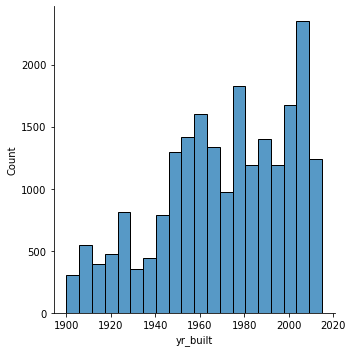

In [40]:
#14     yr_built: Built year
sns.displot(df.yr_built, bins=20)
plt.show()

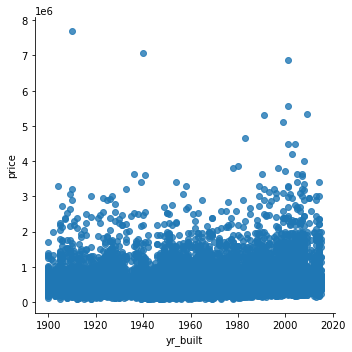

In [78]:
sns.lmplot(x='yr_built', y='price', data=df)

In [42]:
#15 yr_renovated
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [67]:
df_ren = df[(df['yr_renovated'] > 0)]
df_ren

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
35,20140613T000000,696000.0,3,2.50,2300,3060,1.5,0,0,3,8,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264
95,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
103,20141007T000000,1088000.0,3,2.50,2920,8113,2.0,0,0,3,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113
115,20141121T000000,740500.0,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19622,20150114T000000,1150000.0,3,1.75,1760,6788,2.0,1,4,3,7,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588
20057,20140904T000000,434900.0,3,2.00,1520,5040,2.0,0,0,3,7,1520,0,1977,2006,98177,47.7770,-122.362,1860,8710
20444,20150225T000000,500012.0,4,2.50,2400,9612,1.0,0,0,3,8,1230,1170,1962,2009,98059,47.4799,-122.127,2430,5539
20447,20150212T000000,356999.0,3,1.50,1010,1546,2.0,0,0,3,8,1010,0,1971,2014,98144,47.5998,-122.311,1010,1517


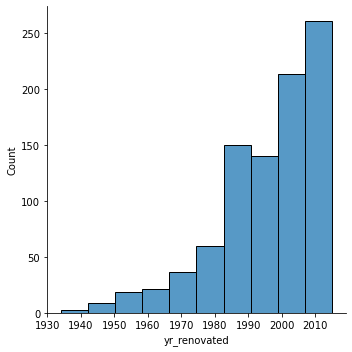

In [70]:
sns.displot(df_ren.yr_renovated, bins=10)
plt.show()

In [74]:
df_ren['yr_ren_cat']=pd.cut(df['yr_renovated'], bins=[0,1950,1975,2000,2025],
                       labels=['before 1950','between 1950-1975','between 1975-2000','after 2000'])

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\82941076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ren['yr_ren_cat']=pd.cut(df['yr_renovated'], bins=[0,1950,1975,2000,2025],


In [75]:
df_ren['yr_ren_cat'].value_counts()

after 2000           423
between 1975-2000    396
between 1950-1975     83
before 1950           12
Name: yr_ren_cat, dtype: int64

In [77]:
df_ren.groupby('yr_ren_cat').agg(
    {
        'price':[min, average, max],
    })

price                          
                        min        average        max
yr_ren_cat                                           
before 1950        152275.0  385743.750000   565000.0
between 1950-1975  160000.0  503443.795181  2050000.0
between 1975-2000  135000.0  763934.361111  7700000.0
after 2000         110000.0  818093.773050  7062500.0

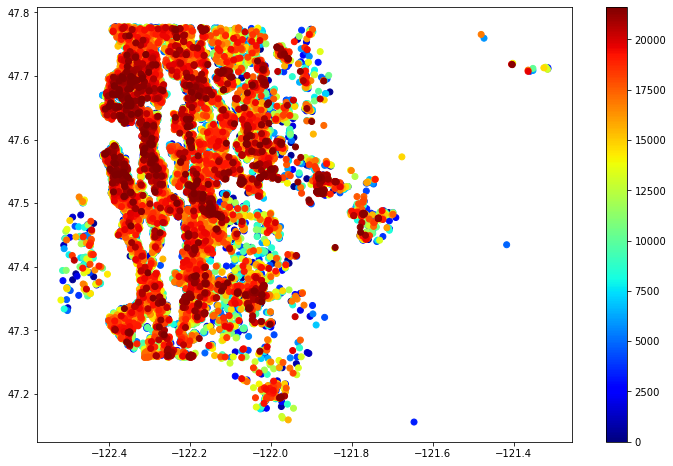

In [10]:
#16-17 longittude, lattitude
fig, ax=plt.subplots(figsize=(12,8))
sc=ax.scatter(df['long'], df['lat'], c=df['price'].index, cmap=plt.get_cmap('jet'))
plt.colorbar(sc)
plt.show()

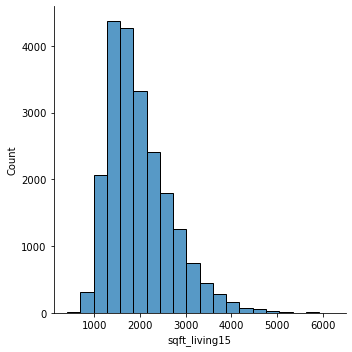

In [44]:
#18 sqft_living15
sns.displot(df.sqft_living15, bins=20)
plt.show()

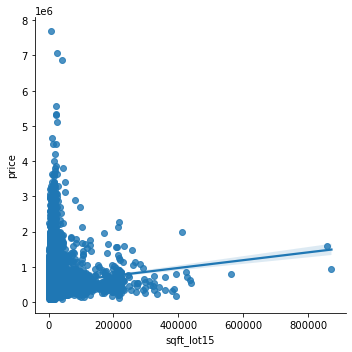

In [51]:
#19 sqft_lot15
sns.lmplot(x='sqft_lot15', y='price', data=df)

In [52]:
df[df['sqft_lot15']>600000].sort_values('price')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9714,20150107T000000,937500.0,4,4.0,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.676,-121.882,3420,871200
20452,20150415T000000,1600000.0,4,5.5,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.664,-121.878,1280,858132


In [56]:
df['sqft_lot15'].quantile(.99)

157687.0

In [64]:
# deleting three outliers
df.drop(df[df['sqft_lot15'] > 500000].index, inplace=True)

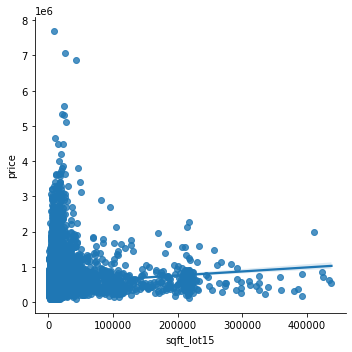

In [65]:
sns.lmplot(x='sqft_lot15', y='price', data=df)